<a href="https://colab.research.google.com/github/AndrewPiasecki/PythonCourse/blob/main/ProjectML_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC




In [18]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for KNN (flatten images)
x_train_knn = x_train.reshape(-1, 32 * 32 * 3)
x_test_knn = x_test.reshape(-1, 32 * 32 * 3)

In [19]:
# Define Random Forest model (baseline)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [20]:
# Define KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [21]:
# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output units for 10 classes



In [22]:
# Compile CNN model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [24]:
# Train Random Forest model
rf.fit(x_train.reshape(-1, 32 * 32 * 3), y_train.ravel())

RandomForestClassifier(random_state=42)

In [25]:
# Train KNN model
knn.fit(x_train_knn, y_train.ravel())

KNeighborsClassifier()

In [26]:
# Train CNN model with early stopping
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/50
1563/1563 [==============================] - 64s 40ms/step - loss: 1.4907 - accuracy: 0.4649 - val_loss: 1.2848 - val_accuracy: 0.5416
Epoch 2/50
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1201 - accuracy: 0.6073 - val_loss: 1.0335 - val_accuracy: 0.6431
Epoch 3/50
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9803 - accuracy: 0.6569 - val_loss: 0.9928 - val_accuracy: 0.6505
Epoch 4/50
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8910 - accuracy: 0.6929 - val_loss: 0.9178 - val_accuracy: 0.6786
Epoch 5/50
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8239 - accuracy: 0.7153 - val_loss: 0.9233 - val_accuracy: 0.6819
Epoch 6/50
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7710 - accuracy: 0.7318 - val_loss: 0.8921 - val_accuracy: 0.6952
Epoch 7/50
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7159 - accuracy: 0.7511 - val_loss: 0.9286 -

In [27]:
# Evaluate Random Forest model
rf_pred = rf.predict(x_test.reshape(-1, 32 * 32 * 3))
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

In [28]:
# Evaluate KNN model
knn_pred = knn.predict(x_test_knn)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

In [29]:
# Evaluate CNN model
cnn_loss, cnn_accuracy = model.evaluate(x_test, y_test)
cnn_pred = np.argmax(model.predict(x_test), axis=-1)
cnn_precision = precision_score(y_test, cnn_pred, average='macro')
cnn_recall = recall_score(y_test, cnn_pred, average='macro')
cnn_f1 = f1_score(y_test, cnn_pred, average='macro')

313/313 [==============================] - 3s 10ms/step


Random Forest Model:
Accuracy: 0.4654
Precision (Macro): 0.4610167392895054
Recall (Macro): 0.4654
F1-Score (Macro): 0.4620635444371267


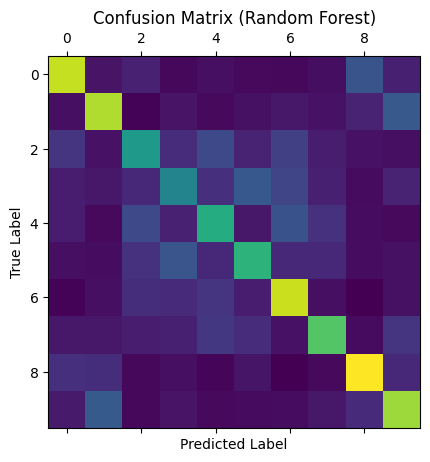


KNN Model:
Accuracy: 0.3398
Precision (Macro): 0.43042618255284965
Recall (Macro): 0.3398
F1-Score (Macro): 0.3260170986061005


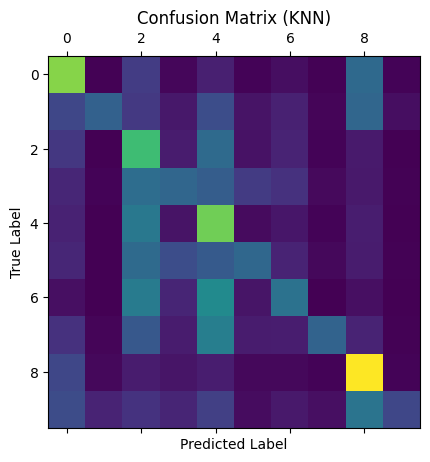


CNN Model:
Test Loss: 0.9496734142303467
Test Accuracy: 0.7044000029563904
Precision (Macro): 0.7029046756724526
Recall (Macro): 0.7043999999999999
F1-Score (Macro): 0.7018099541983636


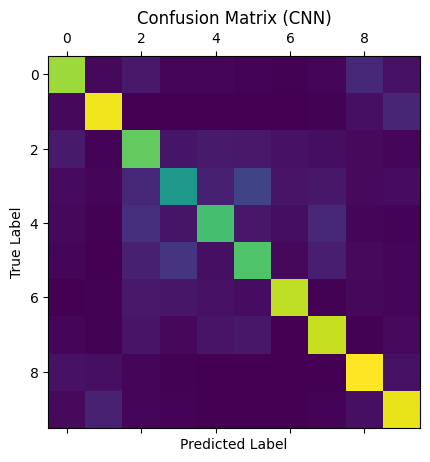

In [30]:
def plot_confusion_matrix(y_true, y_pred, model_name):
  """
  Plots the Confusion Matrix for a given model.

  Args:
      y_true: Ground truth labels (array-like).
      y_pred: Predicted labels (array-like).
      model_name: Name of the model (string).
  """
  cm = tf.math.confusion_matrix(y_true, y_pred)

  plt.matshow(cm)
  plt.title(f'Confusion Matrix ({model_name})')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

# Print evaluation results
print("Random Forest Model:")
print("Accuracy:", rf_accuracy)
print("Precision (Macro):", rf_precision)
print("Recall (Macro):", rf_recall)
print("F1-Score (Macro):", rf_f1)

# Visualize Random Forest Confusion Matrix
plot_confusion_matrix(y_test, rf_pred, "Random Forest")

print("\nKNN Model:")
print("Accuracy:", knn_accuracy)
print("Precision (Macro):", knn_precision)
print("Recall (Macro):", knn_recall)
print("F1-Score (Macro):", knn_f1)

# Visualize KNN Confusion Matrix
plot_confusion_matrix(y_test, knn_pred, "KNN")

print("\nCNN Model:")
print("Test Loss:", cnn_loss)
print("Test Accuracy:", cnn_accuracy)
print("Precision (Macro):", cnn_precision)
print("Recall (Macro):", cnn_recall)
print("F1-Score (Macro):", cnn_f1)

# Visualize CNN Confusion Matrix
plot_confusion_matrix(y_test, cnn_pred, "CNN")

